# Ejercicio 2 - Ascensor

En un edificio existen tres ascensores que funcionan de manera simultanea. Se quiere crear un sistema que para cada  llamada realizada por cualquier usuario en cualquier piso asigne a cada ascensor un nivel de prioridad dependiendo de el estado en el que se encuentre y seleccione a aquel con mayor prioridad a la respuesta de dicho llamado.

Los elementos a tener en cuenta son:

### Distancia relativa

Distancia entre la llamada y la ubicación actual del ascensor.
Se calcula como:

IF el ascensor está en camino al piso llamado, entonces <b>DR</b> = 0 

IF Está quieto, entonces <b>DR</b>= |PISO ACTUAL - PISO DEL LLAMADO|

ELSE DR= |PISO DESTINO MAS CERCANO - PISO DEL LLAMADO|

Los conjuntos de pertenencia estarán dados de la siguiente manera:

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Triangular</td><td>[0 0 2]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[1 3 6]</td><td>Media</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 8 9 9]</td><td>Alta</td>
    </tr>
</table>


### Tiempo de espera


<b>TE</b> =|PISO ACTUAL - PISO DEL LLAMADO|

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Trapecio</td><td>[0 0 2 4]</td><td>Corto</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[2 4.5 7]</td><td>Medio</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 7 9 9]</td><td>Largo</td>
    </tr>
</table>

<br>

### Capacidad

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Trapecio</td><td>[0 0 2 4]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[2 4.5 7]</td><td>Media</td>
    </tr>
     <tr>
        <td>Trapecio</td><td>[5 7 9 9]</td><td>Alta</td>
    </tr>
</table>

<br>

### Prioridad

<table style="font-size:15px;margin-left:0px">
    <tr>
        <td>Triangular</td><td>[0 0 0.5]</td><td>Baja</td>
    </tr>
    <tr>
        <td>Triangular</td><td>[0.25 0.5 0.75]</td><td>Media</td>
    </tr>
     <tr>
        <td>Triangular</td><td>[0.5 1 1]</td><td>Alta</td>
    </tr>
</table>



 - Definir un conjunto de reglas para establecer las prioridades a asignar en cada caso
 - Hacer diversas pruebas y verificar que los resultados sean consistentes

In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

<b>Fuente:</b> https://github.com/shubhamgupta1404/Fuzzy-Elevator-Control-System/blob/master/FuzzyLogicElevatorSystemPaper.pdf

## Antecedentes

Definimos el dominio y el nombre de cada uno de los antecedentes

/home/erivas/miniconda3/envs/IA/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


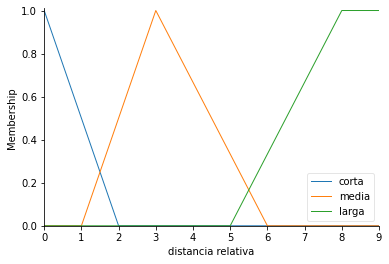

In [2]:
# DISTANCIA RELATIVA

dist_rel = ctrl.Antecedent(np.arange(0, 10, 1), 'distancia relativa')
dist_rel['corta'] = fuzz.trimf(dist_rel.universe, [0, 0, 2])
dist_rel['media'] = fuzz.trimf(dist_rel.universe, [1, 3, 6])
dist_rel['larga'] = fuzz.trapmf(dist_rel.universe, [5, 8, 9, 9])
dist_rel.view()

/home/erivas/miniconda3/envs/IA/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


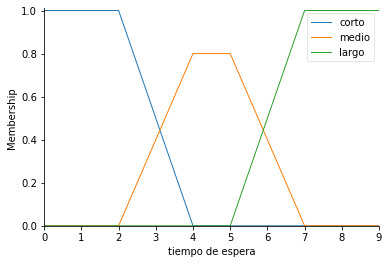

In [3]:
# TIEMPO DE ESPERA
tiempo = ctrl.Antecedent(np.arange(0, 10, 1), 'tiempo de espera')
tiempo['corto'] = fuzz.trapmf(tiempo.universe, [0, 0, 2, 4])
tiempo['medio'] = fuzz.trimf(tiempo.universe, [2, 4.5, 7])
tiempo['largo'] = fuzz.trapmf(tiempo.universe, [5, 7, 9, 9])
tiempo.view()

/home/erivas/miniconda3/envs/IA/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


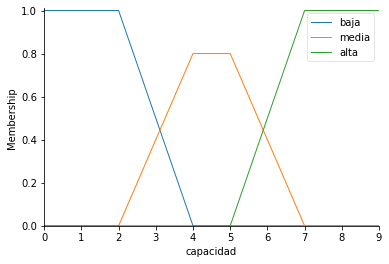

In [4]:
# CAPACIDAD
cap = ctrl.Antecedent(np.arange(0, 10, 1), 'capacidad')
cap['baja'] = fuzz.trapmf(cap.universe, [0, 0, 2, 4])
cap['media'] = fuzz.trimf(cap.universe, [2, 4.5, 7])
cap['alta'] = fuzz.trapmf(cap.universe, [5, 7, 9, 9])
cap.view()

## Consecuentes

Definimos el dominio y el nombre de cada uno de los consecuentes del problema

/home/erivas/miniconda3/envs/IA/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


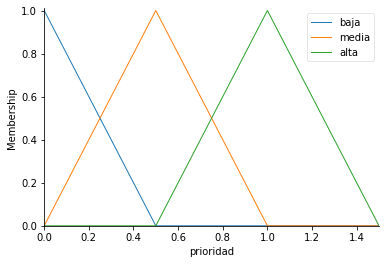

In [5]:
# PRIORIDAD
pri = ctrl.Consequent(np.arange(0, 2, 0.5), 'prioridad')
pri['baja'] = fuzz.trimf(pri.universe, [0, 0, 0.5])
pri['media'] = fuzz.trimf(pri.universe, [0.25, 0.5, 0.75])
pri['alta'] = fuzz.trimf(pri.universe, [0.5, 1, 1])
pri.view()

## Reglas

Definimos las reglas que usará el sistema para tomar decisiones.

In [6]:
pri.defuzzify_method = 'mom'
rules = []
#rules.append(ctrl.Rule(tiempo['corto'] and dist_rel['baja'] or cap['baja'], pri['alta'],))
rules.append(ctrl.Rule(cap['baja'], pri['alta'],))
rules.append(ctrl.Rule(cap['media'], pri['media'],))
rules.append(ctrl.Rule(cap['alta'], pri['baja'],))

rules.append(ctrl.Rule(tiempo['corto'] & dist_rel['corta'], pri['alta'],))
rules.append(ctrl.Rule(tiempo['medio'] & dist_rel['corta'], pri['media'],))
rules.append(ctrl.Rule(tiempo['corto'] & dist_rel['media'], pri['media'],))
rules.append(ctrl.Rule(tiempo['largo'] & dist_rel['media'], pri['media'],))
rules.append(ctrl.Rule(tiempo['medio'] & dist_rel['larga'], pri['baja'],))
rules.append(ctrl.Rule(tiempo['largo'] & dist_rel['larga'], pri['baja'],))

print(rules)

[IF capacidad[baja] THEN prioridad[alta]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF capacidad[media] THEN prioridad[media]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF capacidad[alta] THEN prioridad[baja]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF tiempo de espera[corto] AND distancia relativa[corta] THEN prioridad[alta]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF tiempo de espera[medio] AND distancia relativa[corta] THEN prioridad[media]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF tiempo de espera[corto] AND distancia relativa[media] THEN prioridad[media]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF tiempo de espera[largo] AND distancia relativa[media] THEN prioridad[media]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF tiempo de espera[medio] AND distancia relativa[larga] THEN prioridad[baja]
	AND aggregatio

## Simulación de sistema de control

Creamos una simulación del sistema de control planteado y le damos valores de entrada. Realizaremos inferencias en base a una situación:

Si una persona está en el piso 5:

- Ascensor A en piso 9 quieto, vacio. 
    - Distancia relativa = 4
    - Tiempo de espera = 4
    - Capacidad = 0

- Ascensor B piso 2, en movimiento al piso 8, con 3 personas.
    - Distancia relativa = 4
    - Tiempo de espera = 3
    - Capacidad = 4.5
- Ascensor C piso 7 , en movimiento a piso 5, con 5 personas.
    - Distancia relativa = 2
    - Tiempo de espera = 2
    - Capacidad = 9

 Antecedents 
Antecedent: capacidad               = 0
  - baja                            : 1.0
  - media                           : 0.0
  - alta                            : 0.0
Antecedent: tiempo de espera        = 4
  - corto                           : 0.0
  - medio                           : 0.8
  - largo                           : 0.0
Antecedent: distancia relativa      = 4
  - corta                           : 0.0
  - media                           : 0.6666666666666666
  - larga                           : 0.0

 Rules 
RULE #0:
  IF capacidad[baja] THEN prioridad[alta]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - capacidad[baja]                                        : 1.0
                                           capacidad[baja] = 1.0
  Activation (THEN-clause):
                                           prioridad[alta] : 1.0

RULE #1:
  IF capacidad[media] THEN prioridad[media]
	AND aggregation function : fmin
	OR aggre

/home/erivas/miniconda3/envs/IA/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


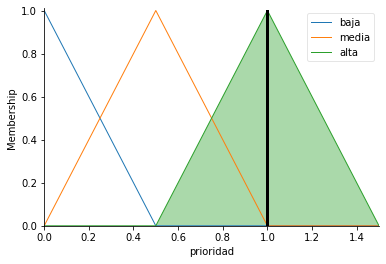

In [7]:
ctrl_elevadores = ctrl.ControlSystem(rules)
elevadores = ctrl.ControlSystemSimulation(ctrl_elevadores)

elevadores.input['distancia relativa'] = 4
elevadores.input['tiempo de espera'] = 4
elevadores.input['capacidad'] = 0

elevadores.compute()
elevadores.print_state()
print(f"Resultado: {elevadores.output['prioridad']}")

pri.view(sim=elevadores)

El ascensor A, considerará a la llamada con una prioridad alta.

 Antecedents 
Antecedent: capacidad               = 4.5
  - baja                            : 0.0
  - media                           : 0.8
  - alta                            : 0.0
Antecedent: tiempo de espera        = 3
  - corto                           : 0.5
  - medio                           : 0.4
  - largo                           : 0.0
Antecedent: distancia relativa      = 4
  - corta                           : 0.0
  - media                           : 0.6666666666666666
  - larga                           : 0.0

 Rules 
RULE #0:
  IF capacidad[baja] THEN prioridad[alta]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - capacidad[baja]                                        : 0.0
                                           capacidad[baja] = 0.0
  Activation (THEN-clause):
                                           prioridad[alta] : 0.0

RULE #1:
  IF capacidad[media] THEN prioridad[media]
	AND aggregation function : fmin
	OR agg

/home/erivas/miniconda3/envs/IA/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


RULE #3:
  IF tiempo de espera[corto] AND distancia relativa[corta] THEN prioridad[alta]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - tiempo de espera[corto]                                : 0.5
  - distancia relativa[corta]                              : 0.0
     tiempo de espera[corto] AND distancia relativa[corta] = 0.0
  Activation (THEN-clause):
                                           prioridad[alta] : 0.0

RULE #4:
  IF tiempo de espera[medio] AND distancia relativa[corta] THEN prioridad[media]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - tiempo de espera[medio]                                : 0.4
  - distancia relativa[corta]                              : 0.0
     tiempo de espera[medio] AND distancia relativa[corta] = 0.0
  Activation (THEN-clause):
                                          prioridad[media] : 0.0

RULE #5:
  IF tiempo de espera[corto] AND distancia rel

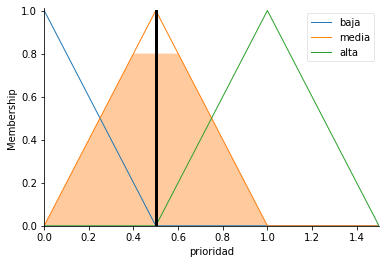

In [8]:
ctrl_elevadores = ctrl.ControlSystem(rules)
elevadores = ctrl.ControlSystemSimulation(ctrl_elevadores)

elevadores.input['distancia relativa'] = 4
elevadores.input['tiempo de espera'] = 3
elevadores.input['capacidad'] = 4.5

elevadores.compute()
elevadores.print_state()
print(f"Resultado: {elevadores.output['prioridad']}")

pri.view(sim=elevadores)

El ascensor B, considerará a la llamada con una prioridad media.

 Antecedents 
Antecedent: capacidad               = 9
  - baja                            : 0.0
  - media                           : 0.0
  - alta                            : 1.0
Antecedent: tiempo de espera        = 2
  - corto                           : 1.0
  - medio                           : 0.0
  - largo                           : 0.0
Antecedent: distancia relativa      = 2
  - corta                           : 0.0
  - media                           : 0.5
  - larga                           : 0.0

 Rules 
RULE #0:
  IF capacidad[baja] THEN prioridad[alta]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - capacidad[baja]                                        : 0.0
                                           capacidad[baja] = 0.0
  Activation (THEN-clause):
                                           prioridad[alta] : 0.0

RULE #1:
  IF capacidad[media] THEN prioridad[media]
	AND aggregation function : fmin
	OR aggregation function

/home/erivas/miniconda3/envs/IA/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


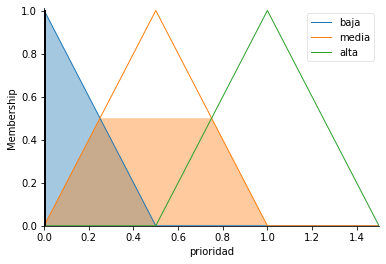

In [9]:
ctrl_elevadores = ctrl.ControlSystem(rules)
elevadores = ctrl.ControlSystemSimulation(ctrl_elevadores)

elevadores.input['distancia relativa'] = 2
elevadores.input['tiempo de espera'] = 2
elevadores.input['capacidad'] = 9

elevadores.compute()
elevadores.print_state()
print(f"Resultado: {elevadores.output['prioridad']}")

pri.view(sim=elevadores)

El ascensor C, considerará a la llamada con una prioridad baja.